## Введение

**Описание проекта**

Наша компания решила быть на волне и купила крупный сервис для чтения книг по подписке. Наша первая задача как аналитика — проанализировать базу данных. В ней — информация о книгах, издательствах, авторах, а также пользовательские обзоры книг. Эти данные помогут сформулировать ценностное предложение для нового продукта.

**Цель:** сделать выводы на основе проведенного анализа, которые помогут сформулировать ценностное предложение для нового продукта.
    
**Задачи:**
- проанализировать базу данных.

**Описание данных:** 

Таблица books содержит данные о книгах.

Таблица authors содержит данные об авторах.

Таблица publishers содержит данные об издательствах.

Таблица ratings содержит данные о пользовательских оценках книг.

Таблица reviews содержит данные о пользовательских обзорах.

## Библиотеки и данные

In [1]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import text, create_engine
from IPython.display import Image

Схема данных


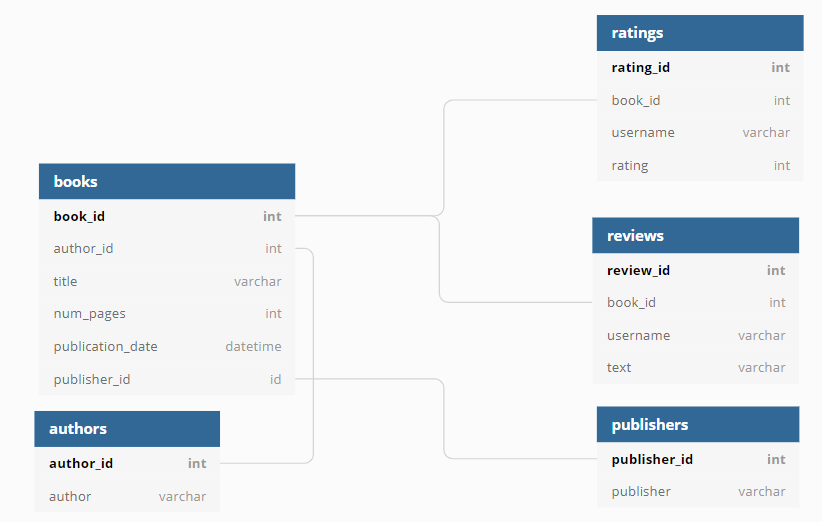

In [2]:
print('Схема данных')
Image("https://pictures.s3.yandex.net/resources/scheme_1589269096.png") 

In [3]:
# устанавливаем параметры
db_config = {'user': 'praktikum_student', # имя пользователя
'pwd': 'Sdf4$2;d-d30pp', # пароль
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # порт подключения
'db': 'data-analyst-final-project-db'} # название базы данных
connection_string = 'postgresql://{user}:{pwd}@{host}:{port}/{db}'.format(**db_config)

# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'})


In [4]:
# чтобы выполнить SQL-запрос, используем Pandas
query = '''SELECT * FROM books LIMIT 5'''
con=engine.connect()
pd.io.sql.read_sql(sql=text(query), con = con)

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


In [5]:
# чтобы выполнить SQL-запрос, используем Pandas
query = '''SELECT * FROM authors LIMIT 5'''
con=engine.connect()
pd.io.sql.read_sql(sql=text(query), con = con)

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


In [6]:
# чтобы выполнить SQL-запрос, используем Pandas
query = '''SELECT * FROM ratings LIMIT 5'''
con=engine.connect()
pd.io.sql.read_sql(sql=text(query), con = con)

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


In [7]:
# чтобы выполнить SQL-запрос, используем Pandas
query = '''SELECT * FROM reviews LIMIT 5'''
con=engine.connect()
pd.io.sql.read_sql(sql=text(query), con = con)

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


In [8]:
# чтобы выполнить SQL-запрос, используем Pandas
query = '''SELECT * FROM publishers LIMIT 5'''
con=engine.connect()
pd.io.sql.read_sql(sql=text(query), con = con)

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


**Вывод:** загрузили все таблицы, вывели первые 5 строк.

## Задания

### Посчитайте, сколько книг вышло после 1 января 2000 года 

In [9]:
query = '''
SELECT COUNT(book_id)
FROM books
WHERE publication_date > '2000-01-01'
'''

pd.read_sql_query(query, con = engine)

,count
0,819


### Для каждой книги посчитайте количество обзоров и среднюю оценку

In [10]:
# посчитаем количество обзоров в таблице reviews 
query = '''
SELECT COUNT(DISTINCT(review_id))
FROM reviews

'''

pd.read_sql_query(query, con = engine)

,count
0,2793


In [13]:
query = '''
WITH 
a AS (SELECT book_id,
             COUNT(review_id) AS count_reviews
             FROM reviews
             GROUP BY book_id),
c AS (SELECT book_id,
             AVG(rating) AS avg_rating
             FROM ratings
             GROUP BY book_id)
SELECT b.book_id,
       b.title,
       c.avg_rating,
       a.count_reviews
FROM books AS b
LEFT JOIN a ON b.book_id=a.book_id
LEFT JOIN c ON b.book_id=c.book_id
'''

pd.read_sql_query(query, con = engine)

,book_id,title,avg_rating,count_reviews
0,652,The Body in the Library (Miss Marple #3),4.500000,2.0
1,273,Galápagos,4.500000,2.0
2,51,A Tree Grows in Brooklyn,4.250000,5.0
3,951,Undaunted Courage: The Pioneering First Missio...,4.000000,2.0
4,839,The Prophet,4.285714,4.0
...,...,...,...,...
995,672,The Cat in the Hat and Other Dr. Seuss Favorites,5.000000,NaN
996,83,Anne Rice's The Vampire Lestat: A Graphic Novel,3.666667,NaN
997,221,Essential Tales and Poems,4.000000,NaN
998,387,Leonardo's Notebooks,4.000000,NaN


### Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры;

In [14]:
query = '''
SELECT bb.publisher_id,
       bb.publisher,    
       COUNT(bb.only_book) 
FROM (SELECT b.book_id AS only_book,
             p.publisher,
             p.publisher_id
     FROM books AS b
     LEFT JOIN publishers AS p ON b.publisher_id=p.publisher_id 
     WHERE b.num_pages > 50) AS bb     
GROUP BY bb.publisher, bb.publisher_id 
ORDER BY COUNT(bb.only_book) DESC
LIMIT 1
'''

pd.read_sql_query(query, con = engine)

,publisher_id,publisher,count
0,212,Penguin Books,42


### Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками;

In [15]:
query = '''
WITH
ab AS (SELECT book_id,
              COUNT(rating) AS all_ratings
       FROM ratings 
       GROUP BY book_id
       HAVING COUNT(rating) >= 50)
SELECT b.author_id,
       a.author,
       AVG(r.rating)
FROM books AS b
INNER JOIN ab ON b.book_id=ab.book_id
INNER JOIN authors AS a ON b.author_id=a.author_id
INNER JOIN ratings AS r ON r.book_id=b.book_id
GROUP BY b.author_id, a.author
ORDER BY AVG(r.rating) DESC
LIMIT 1
'''

pd.read_sql_query(query, con = engine)

,author_id,author,avg
0,236,J.K. Rowling/Mary GrandPré,4.287097


### Посчитайте среднее количество обзоров от пользователей, которые поставили больше 48 оценок.

In [16]:
query = '''
WITH 
ac AS (
SELECT DISTINCT(rv.username),
COUNT(rv.review_id) AS all_reviews
FROM reviews AS rv
WHERE rv.username IN (SELECT ab.users
FROM (SELECT DISTINCT(r.username) AS users,
COUNT(r.rating) AS all_ratings
FROM ratings AS r
GROUP BY r.username
HAVING COUNT(r.rating) > 48) AS ab)
GROUP BY rv.username)
SELECT AVG(ac.all_reviews)
FROM ac

'''

pd.read_sql_query(query, con = engine)

,avg
0,24.0


**Вывод:** мы загрузили библиотеки, отобразили схему данных и таблицы. Для каждой книги мы посчитали количество обзоров и среднюю оценку. Также по результатам анализа выявили, что: 
- 819 книг было выпущено после 1 января 2020 года;
- издательство Penguin Books выпустило максимальное количество книг больше 50 страниц - их 42;
- среди авторов наиболее популярных книг с 50 и более оценками определили автора с самыми высокими оценками - им стали Дж.К. Роулинг и Мэри ГрандПре - автор и иллюстратор книг о Гарри Поттере - им поставили оценку 4.3;
- среднее количество обзоров от пользователей, поставивших более 48 оценок, составило 24. 
